### IMPORTS

In [2]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

### KNN DO ZSCORE

In [3]:
target = 'ALARM'

filename = 'air_quality_scaled_zscore'
train: DataFrame = read_csv(f'data/dataset_2{filename}_train.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'data/dataset_2{filename}_test.csv')
#test.drop(['CRASH_DATE','CRASH_TIME'],axis=1,inplace=True)
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

nvalues = [1, 7, 15]#, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev', 'minkowski']
f1 = {}
recall = {}
accuracy = {}
precision = {}

best_f1 = (0, '')
last_best_f1 = 0

best_recall = (0, '')
last_best_recall = 0

best_accuracy = (0, '')
last_best_accuracy = 0

best_precision = (0, '')
last_best_precision = 0


for d in dist:
    print(d)
    yvalues_f1 = []
    yvalues_recall = []
    yvalues_accuracy = []
    yvalues_precision = []

    for n in nvalues:
        print(n)
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        
        yvalues_f1.append(f1_score(tstY, prdY, pos_label='Danger')) ## Using F1 SCORE
        if yvalues_f1[-1] > last_best_f1:
            best_f1 = (n, d)
            last_best_f1 = yvalues_f1[-1]
            
        yvalues_recall.append(recall_score(tstY, prdY, pos_label='Danger')) ## Using RECALL SCORE
        if yvalues_recall[-1] > last_best_recall:
            best_recall = (n, d)
            last_best_recall = yvalues_recall[-1]
            
        yvalues_accuracy.append(accuracy_score(tstY, prdY)) ## Using ACCURACY SCORE
        if yvalues_accuracy[-1] > last_best_accuracy:
            best_accuracy = (n, d)
            last_best_accuracy = yvalues_accuracy[-1]
            
        yvalues_precision.append(precision_score(tstY, prdY, pos_label='Danger')) ## Using ACCURACY SCORE
        if yvalues_precision[-1] > last_best_precision:
            best_precision = (n, d)
            last_best_precision = yvalues_precision[-1]
            
    f1[d] = yvalues_f1
    recall[d] = yvalues_recall
    accuracy[d] = yvalues_accuracy
    precision[d] = yvalues_precision

figure()
multiple_line_chart(nvalues, f1, title='KNN variants', xlabel='n', ylabel='f1_score', percentage=True)
savefig('lab3_images/dataset_2/air_quality_zscore_knn_f1_study.png')
show()

figure()
multiple_line_chart(nvalues, recall, title='KNN variants', xlabel='n', ylabel='recall_score', percentage=True)
savefig('lab3_images/dataset_2/air_quality_zscore_knn_recall_study.png')
show()

figure()
multiple_line_chart(nvalues, accuracy, title='KNN variants', xlabel='n', ylabel='accuracy_score', percentage=True)
savefig('lab3_images/dataset_2/air_quality_zscore_knn_accuracy_study.png')
show()

figure()
multiple_line_chart(nvalues, precision, title='KNN variants', xlabel='n', ylabel='precision_score', percentage=True)
savefig('lab3_images/dataset_2/air_quality_zscore_knn_precision_study.png')
show()

print('Best results with %d neighbors and %s'%(best_f1[0], best_f1[1]))

manhattan
1
7


KeyboardInterrupt: 

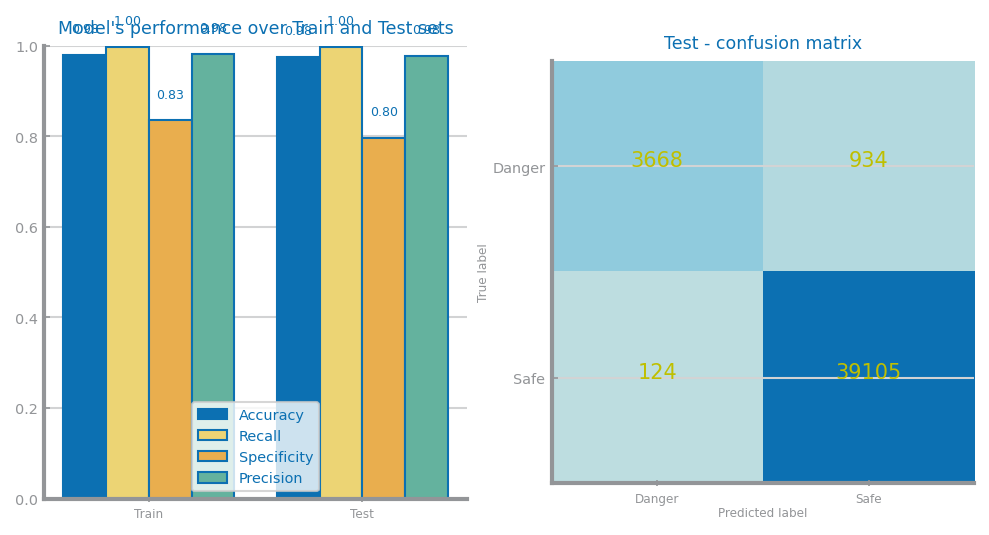

In [ ]:
clf = knn = KNeighborsClassifier(n_neighbors=best_precision[0], metric=best_precision[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig('lab3_images/dataset_2/air_quality_knn_zscore_best_ds2.png')
show()

### KNN DO MINMAX

manhattan
1
7
15
euclidean
1
7
15
chebyshev
1
7
15
minkowski
1
7
15


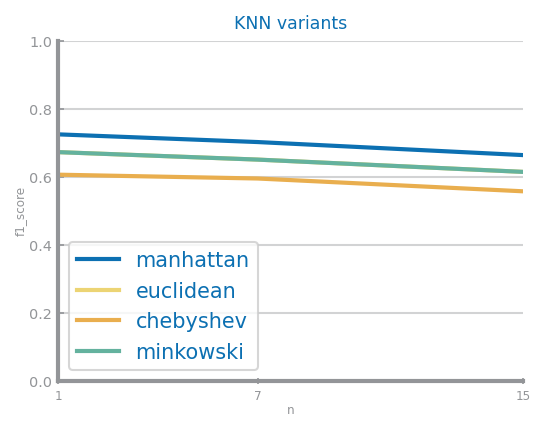

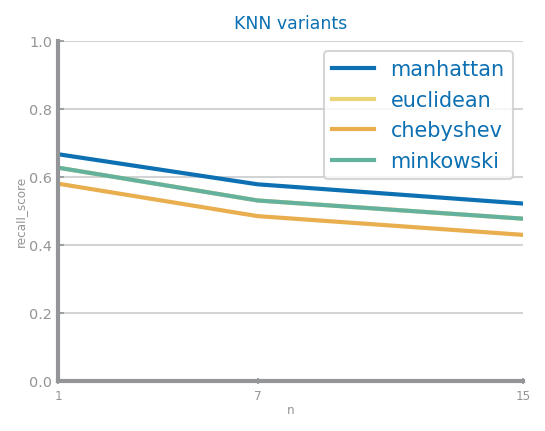

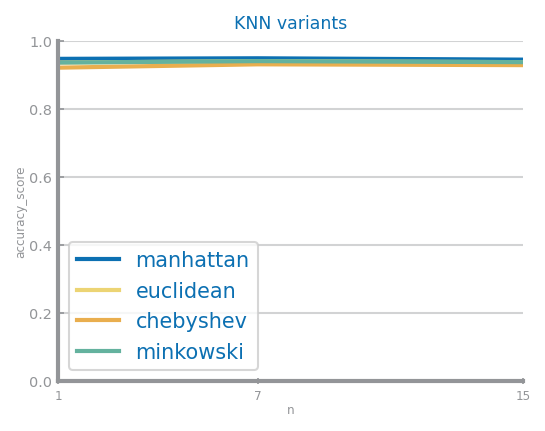

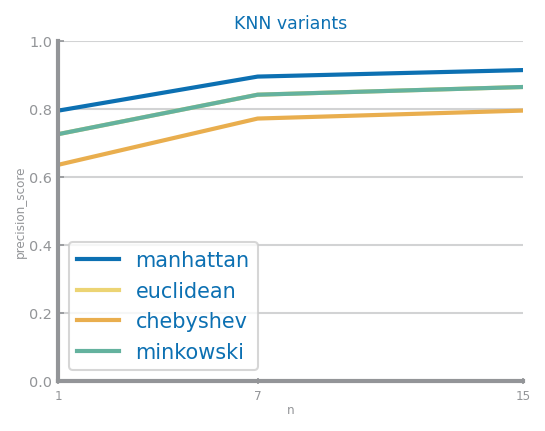

Best results with 1 neighbors and manhattan


In [ ]:
filename = 'air_quality_scaled_minmax'
train: DataFrame = read_csv(f'data/dataset_2{filename}_train.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'data/dataset_2{filename}_test.csv')
#test.drop(['CRASH_DATE','CRASH_TIME'],axis=1,inplace=True)
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

nvalues = [1, 7, 15]#, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev', 'minkowski']
f1 = {}
recall = {}
accuracy = {}
precision = {}

best_f1 = (0, '')
last_best_f1 = 0

best_recall = (0, '')
last_best_recall = 0

best_accuracy = (0, '')
last_best_accuracy = 0

best_precision = (0, '')
last_best_precision = 0


for d in dist:
    print(d)
    yvalues_f1 = []
    yvalues_recall = []
    yvalues_accuracy = []
    yvalues_precision = []

    for n in nvalues:
        print(n)
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        
        yvalues_f1.append(f1_score(tstY, prdY, pos_label='Danger')) ## Using F1 SCORE
        if yvalues_f1[-1] > last_best_f1:
            best_f1 = (n, d)
            last_best_f1 = yvalues_f1[-1]
            
        yvalues_recall.append(recall_score(tstY, prdY, pos_label='Danger')) ## Using RECALL SCORE
        if yvalues_recall[-1] > last_best_recall:
            best_recall = (n, d)
            last_best_recall = yvalues_recall[-1]
            
        yvalues_accuracy.append(accuracy_score(tstY, prdY)) ## Using ACCURACY SCORE
        if yvalues_accuracy[-1] > last_best_accuracy:
            best_accuracy = (n, d)
            last_best_accuracy = yvalues_accuracy[-1]
            
        yvalues_precision.append(precision_score(tstY, prdY, pos_label='Danger')) ## Using ACCURACY SCORE
        if yvalues_precision[-1] > last_best_precision:
            best_precision = (n, d)
            last_best_precision = yvalues_precision[-1]
            
    f1[d] = yvalues_f1
    recall[d] = yvalues_recall
    accuracy[d] = yvalues_accuracy
    precision[d] = yvalues_precision

figure()
multiple_line_chart(nvalues, f1, title='KNN variants', xlabel='n', ylabel='f1_score', percentage=True)
savefig('lab3_images/dataset_2/air_quality_minmax_knn_f1_study.png')
show()

figure()
multiple_line_chart(nvalues, recall, title='KNN variants', xlabel='n', ylabel='recall_score', percentage=True)
savefig('lab3_images/dataset_2/air_quality_minmax_knn_recall_study.png')
show()

figure()
multiple_line_chart(nvalues, accuracy, title='KNN variants', xlabel='n', ylabel='accuracy_score', percentage=True)
savefig('lab3_images/dataset_2/air_quality_minmax_knn_accuracy_study.png')
show()

figure()
multiple_line_chart(nvalues, precision, title='KNN variants', xlabel='n', ylabel='precision_score', percentage=True)
savefig('lab3_images/dataset_2/air_quality_minmax_knn_precision_study.png')
show()

print('Best results with %d neighbors and %s'%(best_f1[0], best_f1[1]))

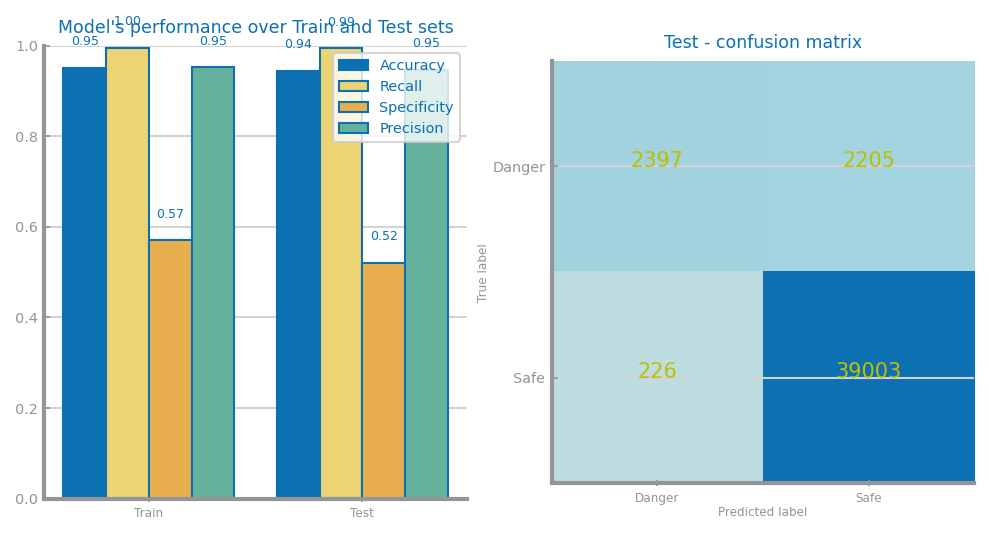

In [ ]:
clf = knn = KNeighborsClassifier(n_neighbors=best_precision[0], metric=best_precision[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig('lab3_images/dataset_2/air_quality_knn_minmax_best_ds2.png')
show()